In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd

In [34]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
engine = create_engine("sqlite:////Users/baileymaier/Desktop/GWU - Data Analytics/Module 8 - SQLAlchemy/Resources/hawaii (1).sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

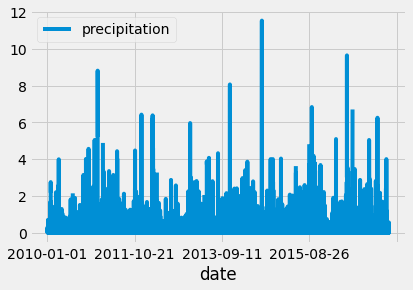

In [41]:
#get previous years data
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [43]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [44]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


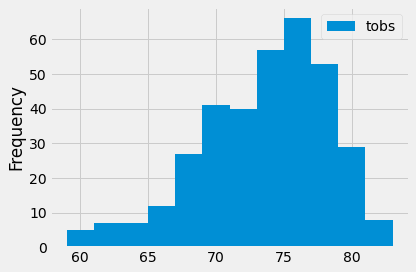

In [47]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()

# Challenge
## D1: Determine the Summary Statistics for June

In [77]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [78]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
#print(results)

In [79]:
#3. Convert the June temperatures to a list.
june_temps = list(results)
#print(june_temps)

In [80]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results, columns=['date', 'June Percip', 'June Temps'])
june_df = june_df.set_index(june_df['date'], inplace=False)
print(june_df)

                  date  June Percip  June Temps
date                                           
2010-06-01  2010-06-01         0.00        78.0
2010-06-02  2010-06-02         0.01        76.0
2010-06-03  2010-06-03         0.00        78.0
2010-06-04  2010-06-04         0.00        76.0
2010-06-05  2010-06-05         0.00        77.0
...                ...          ...         ...
2017-06-26  2017-06-26         0.02        79.0
2017-06-27  2017-06-27         0.10        74.0
2017-06-28  2017-06-28         0.02        74.0
2017-06-29  2017-06-29         0.04        76.0
2017-06-30  2017-06-30         0.20        75.0

[1700 rows x 3 columns]


In [81]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Percip,June Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


## D2: Determine the Summary Statistics for December

In [72]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [73]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of December. 

results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
#print(results)

In [74]:
#3. Convert the December temperatures to a list.
dec_temps = list(results)
#print(dec_temps)

In [75]:
# 4. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results, columns=['date', 'Dec Percip','Dec Temps'])
dec_df = dec_df.set_index(dec_df['date'], inplace=False)
#print(dec_df)

In [76]:
# 5. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Percip,Dec Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000
